## Introduction

XGBoost is one of the leading ML model, so it seemed only fair to perform experiment on it. 

## Description

For this experiment, only Ratio dataset was used. Commonly used parameters along with weights were used for XGBoost. The recall produced was 0.8 for the negative class and 0.69 for the positive class with an AUC of 0.82934. Moreover, 'ppegt/at' was the most important feature.   

## Conclusions

Results seems to be better than RUSBoost and maybe hypertuning might give us better results. The AUC score produced is the highest so far. Mostly, ratios with 'at' seemed to be important. Only ppegt (Property, Plant and Equipment - Total (Gross)), csho (Common Shares Outstanding) and re(Retained Earnings) were the ones which appeared as most important features in top 10 with both 'sale' and 'at'. 

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# confusion matrix plot
def plot_cm(cm):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(cm, annot=True,cmap="OrRd",fmt='g')
    plt.title('confusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

In [3]:
# plots ROC curve
def ROC(y_test,probs):
    import sklearn.metrics as metrics
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = f'AUC = {round(roc_auc,3)}')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
df = pd.read_csv("Dataset/uni_ratios_fraud.csv",sep = ';')
df.head()

,g_id,fyear,gvkey,fraud,sale_flag,at_flag,sale/at,at/sale,act/sale,act/at,...,rect/sale,rect/at,sstk/sale,sstk/at,txp/sale,txp/at,txt/sale,txt/at,xint/sale,xint/at
0,100001990,1990.0,10000.0,0.0,0,0,1.203083,0.831198,0.631982,0.760326,...,0.159846,0.192308,0.000024,0.000028,0.001105,0.001329,0.003804,0.004577,0.037299,0.044873
1,100001991,1991.0,10000.0,0.0,0,0,1.361683,0.734385,0.545042,0.742175,...,0.146434,0.199397,0.000037,0.000051,0.000922,0.001255,0.002201,0.002997,0.032109,0.043722
2,100001992,1992.0,10000.0,0.0,0,0,1.428408,0.700080,0.495408,0.707644,...,0.156451,0.223476,0.000037,0.000053,0.003290,0.004700,0.003626,0.005180,0.023040,0.032910
3,100001993,1993.0,10000.0,0.0,0,0,1.376801,0.726321,0.521222,0.717620,...,0.167717,0.230913,0.008726,0.012014,0.007921,0.010906,0.014081,0.019386,0.021179,0.029159
4,100001994,1994.0,10000.0,0.0,0,0,1.365206,0.732490,0.524201,0.715642,...,0.182585,0.249266,0.000840,0.001146,0.000000,0.000000,0.018308,0.024994,0.019176,0.026179


In [5]:
df.describe()

,g_id,fyear,gvkey,fraud,sale_flag,at_flag,sale/at,at/sale,act/sale,act/at,...,rect/sale,rect/at,sstk/sale,sstk/at,txp/sale,txp/at,txt/sale,txt/at,xint/sale,xint/at
count,1.460450e+05,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,...,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000,146045.000000
mean,5.424364e+08,2002.011702,54243.435516,0.006601,0.071225,0.004047,2.834339,16.423917,7.483634,0.495074,...,0.433393,0.150481,5.437247,0.241497,0.073672,0.006898,-0.019277,0.014842,0.705279,0.264401
std,5.993746e+08,6.959894,59937.455765,0.080976,0.257201,0.063485,47.186967,330.139351,222.627523,0.273108,...,11.264734,0.137669,168.909065,5.241214,9.490696,0.164446,10.789259,0.522142,27.866052,18.557445
min,1.004199e+07,1990.000000,1004.000000,0.000000,0.000000,0.000000,-11.538462,-1990.120000,-333.263158,-0.666667,...,-142.400000,-0.243243,-562.631579,-0.172085,-16.777778,-0.021008,-2857.375000,-36.000000,-47.603448,-0.286667
25%,1.065820e+08,1996.000000,10658.000000,0.000000,0.000000,0.000000,0.423298,0.680021,0.285714,0.266761,...,0.085818,0.043956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003179,0.002902
50%,2.508820e+08,2002.000000,25088.000000,0.000000,0.000000,0.000000,0.888315,1.124941,0.451608,0.494892,...,0.150417,0.119544,0.004559,0.004269,0.000000,0.000000,0.005268,0.004720,0.014811,0.013998
75%,6.658620e+08,2008.000000,66586.000000,0.000000,0.000000,0.000000,1.469601,2.359249,0.827804,0.717052,...,0.221603,0.218024,0.078916,0.052289,0.006241,0.005822,0.029825,0.027651,0.044776,0.031132
max,3.172642e+09,2014.000000,317264.000000,1.000000,1.000000,1.000000,13203.000000,60268.000000,55955.000000,1.096045,...,2506.500000,1.000000,38934.000000,792.000000,2647.000000,61.000000,1946.500000,178.000000,6387.000000,6584.500000


In [172]:
# Splitting data in 80/20 ratio with a random seed of 42 to get consistent results.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,4:], df[['fraud']],test_size=0.20,random_state = 42)

In [82]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
dm_train = xgb.DMatrix(X_train, label=y_train)
dm_test = xgb.DMatrix(X_test, label=y_test)

In [174]:
class_weights = sum(y_train['fraud']==0)/sum(y_train['fraud']==1)
class_weights

147.0811153358682

In [179]:
params = {'max_depth':4, 'min_child_weight':19, 'eta':0.1, 'subsample':1,'gamma':2.5,'eval_metric':'auc', 
          'objective':'binary:logistic','scale_pos_weight' :500,'n_estimators':500}

In [180]:
# if more than one evaluation metric are given the last one is used for early stopping
# xgb_model = xgb.XGBClassifier(learning_rate = 0.8,eval_metric = 'auc',scale_pos_weight=class_weights)
xgb_model = xgb.train(params,dtrain = dm_train, num_boost_round = 500, evals = [(dm_test,"Test")],early_stopping_rounds=10)
# xgb_model.fit(early_stopping_rounds=10)

[20:27:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-auc:0.71636
Will train until Test-auc hasn't improved in 10 rounds.
[1]	Test-auc:0.73630
[2]	Test-auc:0.73891
[3]	Test-auc:0.76034
[4]	Test-auc:0.76489
[5]	Test-auc:0.76327
[6]	Test-auc:0.75911
[7]	Test-auc:0.76275
[8]	Test-auc:0.76448
[9]	Test-auc:0.77260
[10]	Test-auc:0.77337
[11]	Test-auc:0.77717
[12]	Test-auc:0.77699
[13]	Test-auc:0.77892
[14]	Test-auc:0.78043
[15]	Test-auc:0.78543
[16]	Test-auc:0.78444
[17]	Test-auc:0.78537
[18]	Test-auc:0.78575
[19]	Test-auc:0.78470
[20]	Test-auc:0.78594
[21]	Test-auc:0.78573
[22]	Test-auc:0.78694
[23]	Test-auc:0.78792
[24]	Test-auc:0.78927
[25]	Test-auc:

              precision    recall  f1-score   support

         0.0       1.00      0.57      0.72    116047
         1.0       0.02      1.00      0.03       789

    accuracy                           0.57    116836
   macro avg       0.51      0.78      0.38    116836
weighted avg       0.99      0.57      0.72    116836



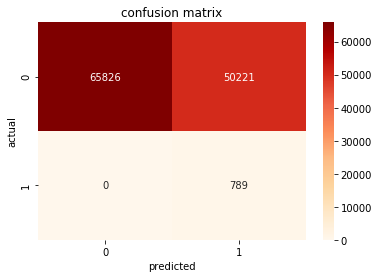

In [181]:
train_pred = xgb_model.predict(dm_train,ntree_limit=xgb_model.best_ntree_limit)
train_pred = np.where(np.array(train_pred) > 0.5, 1, 0)
print(classification_report(y_train,train_pred))
cm = confusion_matrix(y_train,train_pred)
plot_cm(cm)

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72     29034
         1.0       0.01      0.85      0.02       175

    accuracy                           0.56     29209
   macro avg       0.50      0.71      0.37     29209
weighted avg       0.99      0.56      0.71     29209



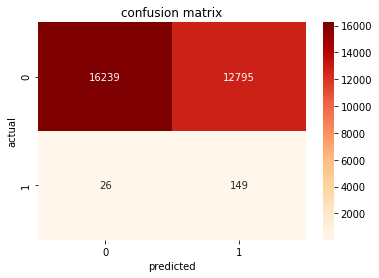

In [182]:
test_pred = xgb_model.predict(dm_test,ntree_limit=xgb_model.best_ntree_limit)
test_pred = np.where(np.array(test_pred) > 0.5, 1, 0)
print(classification_report(y_test,test_pred))
cm = confusion_matrix(y_test,test_pred)
plot_cm(cm)

In [134]:
# train_pred = xgb_model.predict(X_train,ntree_limit=xgb_model.best_ntree_limit)
# print(classification_report(y_train,train_pred))
# cm = confusion_matrix(y_train,train_pred)
# plot_cm(cm)

In [101]:
# test_pred = xgb_model.predict(X_test,ntree_limit=xgb_model.best_ntree_limit)
# print(classification_report(y_test,test_pred))
# cm = confusion_matrix(y_test,test_pred)
# plot_cm(cm)

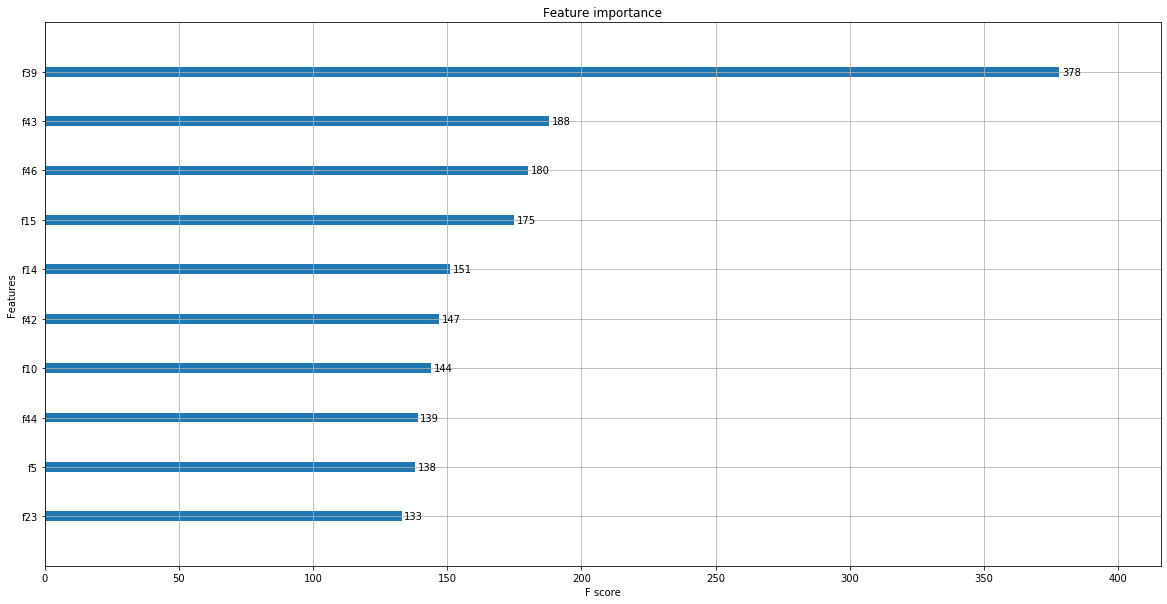

In [171]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20, 10))
# plot
plot_importance(xgb_model,ax = ax,max_num_features = 10)
plt.show()

In [117]:
# !pip install graphviz